In [2]:
# Описание предмета. Цели. Задачи. 
# Проивзедение ван пис на протяжении 12 лет занимает лидирующие места по объёму годовых продаж на рынке японской манги. Сама манга выпускается 1997 года, так что вполне возможно, что занимает она топовые места и с более ранних сроков, но по мере поиска информации, удалось найти в достаточной мере исчерпывающие данные только за полседние 12 лет. Ван пис за 12 лет известной статистики показывает достаточно интересную динамику своих продаж, для такого долговыходящего проивзедения, ведь только спустя 12 лет выхода, в 2009 году, наблюдается резкий рост общего объёма продаж, который после 2011 года выйдя на сумасшедший пик с достаточно большим шагом падает. 
# Целью данной мини-работы является: Выявление паттернов в большей степени влияющих на популярность манги. СОздание предиктивной модели на несколько лет вперед.
# Задачи стоящие на пути: 
# 1. Сбор данных. Построение первичных графиков. 
# 2. Обработка полученных данных простыми моделями времянных рядов. Отбор жизнеспособных моеделей.
# 3. Предсказания за следующие три года (2021-2023). Квантификация предсказаний.
# 4. Создание признаков на основе внутренних и внешних факторов произведения, которые в перспективе смогут улучшить предсказательную сиду моеделй. 
# 5. Тестирование признаков на моеделей. Возможно создание регрессионной модели. 
# 6. Выводы: А. Какие факторы повлияли на успех в определенные годы. 
#            Б. Предсказание объёмов продаж.
#  Написать статью на реддит

In [ ]:
#Часть 1

In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [322]:
data1 = pd.read_excel('D:\Python projects\Python DS\PetPr OnePiece\OnePieceStatTotall.xlsx', index_col=0)

In [323]:
data1

,Total_sales_per_Cu_year,SalesOf_Cu_year_vol,SalesOf_NOTCu_year_vol
Current_year,,,
2008,5956540,4869186,1087354
2009,14721241,7784185,6937056
2010,32343809,12701973,19641836
2011,37996373,12316031,25680342
2012,23464866,12093262,11371604
2013,18151599,11430979,6720620
2014,11885957,8543430,3342527
2015,14102521,11993204,2109317
2016,12314326,10498031,1816295


In [382]:
data1['%_0f_CuS_in_TotalS'] = round(data1.SalesOf_Cu_year_vol/data1.Total_sales_per_Cu_year*100, 2)
data1['%_0f_NOTCuS_in_TotalS'] = round(data1.SalesOf_NOTCu_year_vol/data1.Total_sales_per_Cu_year*100, 2)
data1['%_of_grow_in_SNCY'] =round(((1 -(data1.SalesOf_NOTCu_year_vol/data1.SalesOf_NOTCu_year_vol.shift(-1))).shift(1) * 100),2)


In [383]:
data1

,Total_sales_per_Cu_year,SalesOf_Cu_year_vol,SalesOf_NOTCu_year_vol,%_0f_CuS_in_TotalS,%_0f_NOTCuS_in_TotalS,%_of_grow_in_SNCY
Current_year,,,,,,
2008,5956540,4869186,1087354,81.75,18.25,NaN
2009,14721241,7784185,6937056,52.88,47.12,84.33
2010,32343809,12701973,19641836,39.27,60.73,64.68
2011,37996373,12316031,25680342,32.41,67.59,23.51
2012,23464866,12093262,11371604,51.54,48.46,-125.83
2013,18151599,11430979,6720620,62.98,37.02,-69.20
2014,11885957,8543430,3342527,71.88,28.12,-101.06
2015,14102521,11993204,2109317,85.04,14.96,-58.46
2016,12314326,10498031,1816295,85.25,14.75,-16.13


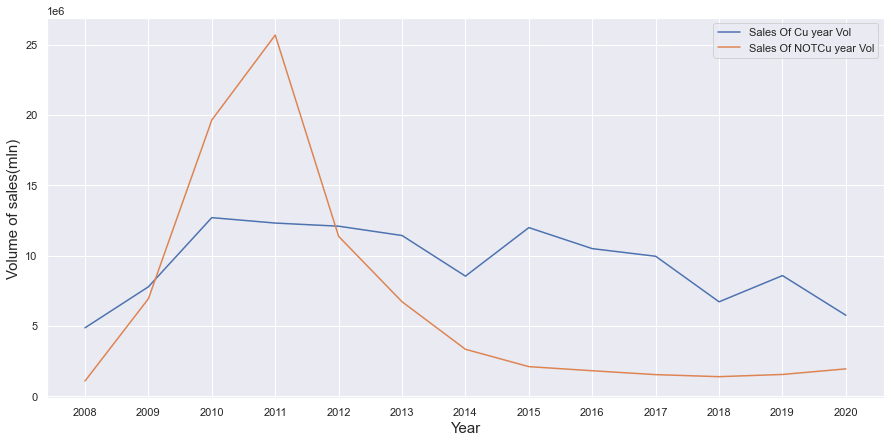

In [318]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.lineplot(x = data1.index, y = 'SalesOf_Cu_year_vol', data=data1, label='Sales Of Cu year Vol');
sns.lineplot(x = data1.index, y = 'SalesOf_NOTCu_year_vol', data=data1, label='Sales Of NOTCu year Vol');
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Volume of sales(mln)', fontsize=15)
plt.xticks(range(2008, 2021));
# plt.legend();

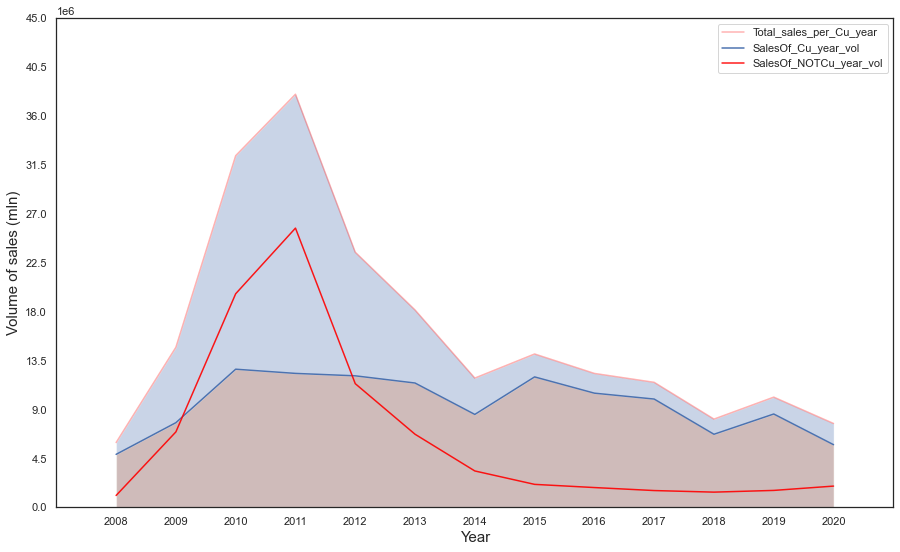

In [316]:
fig,ax = plt.subplots(figsize=(15,9))

sns.lineplot(x = data1.index, y=  'Total_sales_per_Cu_year', data=data1, label='Total sales per Cu year', color="red", alpha=0.3);
sns.lineplot(x = data1.index, y = 'SalesOf_Cu_year_vol', data=data1, label='Sales Of Cu year Vol');
sns.lineplot(x = data1.index, y = 'SalesOf_NOTCu_year_vol', data=data1, label='Sales Of NOTCu year Vol', color='red', alpha=0.9);
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6)) #единицы измерения по y в миллионах


plt.fill_between(data1.index, data1.Total_sales_per_Cu_year, alpha=0.3)
plt.fill_between(data1.index, data1.SalesOf_Cu_year_vol, alpha=0.3)

ax.set(xlim=(2007, 2021)) #отступы по оси Х по краям
# ax.set(ylim=(-4000000, 45000000)) #отступы по оси У по краям
ax.set(ylim=(0, 45000000))

plt.xticks(range(2008, 2021)) #единицы измерения по Х 
plt.xlabel('Year', fontsize=15)

plt.yticks(range(0, 45000001, 4500000));
plt.ylabel('Volume of sales (mln)', fontsize=15)
sns.set_style(style='white') 
# ax.set(ylim=(0, 40000010))



In [ ]:
#БЛОК 3 Тестирование простый временных моделей + Arima, отбор жизнеспособных. Предсказания на 2 года вперед. Квантификация предсказаний.

In [8]:

#Предсказание результатов продаж на основании 5 простых моделей + sarima. То есть модели без учета каких-о внешних или внутренних факторов.

In [9]:
#Анализ продаж текущего года  SalesOf_Cu_year_vol
df1 = data1['SalesOf_Cu_year_vol'] 

In [10]:
X_train = pd.DataFrame(df1.head(11))
X_test = pd.DataFrame(df1.tail(3))

In [11]:
X_train

,SalesOf_Cu_year_vol
Current_year,
2008,4869186
2009,7784185
2010,12701973
2011,12316031
2012,12093262
2013,11430979
2014,8543430
2015,11993204
2016,10498031


In [12]:
X_test

,SalesOf_Cu_year_vol
Current_year,
2018,6718074
2019,8581123
2020,5759228


D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


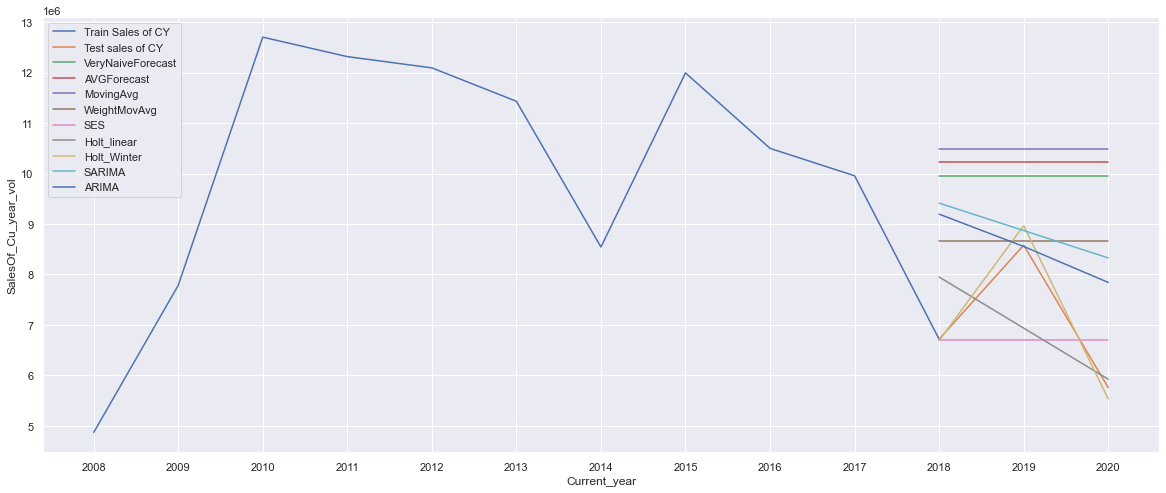

In [506]:
y_hat = X_test.copy() # создаём копию тестовой валидационной таблицы для занесения туда результатов
#Naive model
dd= np.asarray(X_train['SalesOf_Cu_year_vol'])[:-1] # чтобы потом взять последнее, -1 потому что отбрасываем 2018 год, его взяли в трэин только чтобы на графике не  
y_hat['naive'] = dd[len(dd)-1] #создаём новый столбец в y_hat все значения которого равны последнему значению Count в df

#AVG MOdel
y_hat['avg_forecast'] = X_train['SalesOf_Cu_year_vol'][:-1].mean()

#Moving AVG For
y_hat['moving_avg_forecast']=X_train['SalesOf_Cu_year_vol'][:-1].rolling(5).mean().iloc[-1]

#Weights + Moving AVG
weights1 =  np.array([100, 1, 3, 2])
y_hat['Weigth_moving_avg']=X_train['SalesOf_Cu_year_vol'][:-1]. rolling(4).apply(lambda x: np.dot(x, weights1)/weights1.sum(), raw=True).iloc[-1]

#Simple exp smoothing
SimExSmoothing=SimpleExpSmoothing(np.array(X_train['SalesOf_Cu_year_vol'][:-1])).fit(smoothing_level=0.04, optimized=False)
y_hat['SES'] = SimExSmoothing.forecast(len(X_test));

#Holt 
Method_of_Holt=Holt(np.asarray(X_train['SalesOf_Cu_year_vol'][:-1])).fit(smoothing_level=0.1, smoothing_trend = 3.1);
y_hat['Holt_linear'] = Method_of_Holt.forecast(len(X_test));

#Holt+Winter
# Meth_of_H_W = ExponentialSmoothing(np.asarray(X_train['SalesOf_Cu_year_vol'][:-1]), seasonal_periods=2 ,trend='add', seasonal='add').fit(smoothing_level=0.20, smoothing_trend = 2.1) #257934
Meth_of_H_W = ExponentialSmoothing(np.asarray(data1.SalesOf_Cu_year_vol.head(10)), seasonal_periods=2 ,trend='add', seasonal='add').fit(smoothing_level=0.20, smoothing_trend = 2.1) #257934
y_hat['Holt_Winter'] = Meth_of_H_W.forecast(len(X_test))

# SARIMA
X_train2 = X_train.copy() #датафрэйм для саримы, чтобы менять индексы на формат индекс даты
X_train2.index = pd.to_datetime(X_train2.index.values, format='%Y').to_period('Y') #поменяли 

sarimax = sm.tsa.statespace.SARIMAX(X_train2['SalesOf_Cu_year_vol'][:-1], order=(2, 2, 2), seasonal_order=(0,2,0,13), enforce_stationary=True).fit()
# sarimax = sm.tsa.statespace.SARIMAX(X_train2['SalesOf_Cu_year_vol'][:-1], order=(2, 1, 2), seasonal_order=(2,2,0,12), enforce_stationary=True).fit()                       
SarTablet = pd.DataFrame({'SARIMAX':  sarimax.predict(start='2018', end='2020')}) #Таблица с предсказанными значениями
y_hat['SARIMAX'] =np.array(SarTablet.SARIMAX)

# 675	(2, 2, 1)	(0, 0, 0, 13)	195.001497
# 189	(0, 2, 1)	(0, 0, 0, 13)	198.455982
# 648	(2, 2, 0)	(0, 0, 0, 13)	199.837661
# 432	(1, 2, 1)	(0, 0, 0, 13)	200.032554
# 351	(1, 1, 1)	(0, 0, 0, 13)	222.997043

#ARIMA
arima = ARIMA(X_train2['SalesOf_Cu_year_vol'][:-1] , order=(3,2,0)).fit()
ArTablet = pd.DataFrame({'ARIMA': arima.predict(start='2018-01-01', end='2020-01-01')})
y_hat['ARIMA'] =np.array(ArTablet.ARIMA)
                   

##GRAPHICS

fig,ax = plt.subplots(figsize=(20,8))
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
plt.xticks(range(2008, 2021));

sns.lineplot(x = X_train.index, y = 'SalesOf_Cu_year_vol', data = X_train, label='Train Sales of CY') 
sns.lineplot(x = X_test.index, y = 'SalesOf_Cu_year_vol', data = X_test, label='Test sales of CY') 

sns.lineplot(x = y_hat.index, y = 'naive', data = y_hat, label = 'VeryNaiveForecast')
sns.lineplot(x = y_hat.index, y = 'avg_forecast', data = y_hat, label = 'AVGForecast')
sns.lineplot(x = y_hat.index, y = 'moving_avg_forecast', data = y_hat, label = 'MovingAvg')
sns.lineplot(x = y_hat.index, y = 'Weigth_moving_avg', data = y_hat, label = 'WeightMovAvg')
sns.lineplot(x = y_hat.index, y = 'SES', data = y_hat, label = 'SES');
sns.lineplot(x = y_hat.index, y = 'Holt_linear', data = y_hat, label = 'Holt_linear');
sns.lineplot(x = y_hat.index, y = 'Holt_Winter', data = y_hat, label = 'Holt_Winter');
sns.lineplot(x = y_hat.index, y = 'SARIMAX', data = y_hat, label = 'SARIMA');
sns.lineplot(x = y_hat.index, y = 'ARIMA', data = y_hat, label = 'ARIMA');

plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
plt.xticks(range(2008, 2021));

In [583]:
rms4 = sqrt(mean_squared_error(X_test['SalesOf_Cu_year_vol'], y_hat['Holt_Winter']))
rms4

257934.60591342105

In [522]:
mae1 = mean_absolute_error(X_test['SalesOf_Cu_year_vol'], y_hat['Holt_Winter'])
mae1

212379.05814530203

In [507]:
y_hat

,SalesOf_Cu_year_vol,naive,avg_forecast,moving_avg_forecast,Weigth_moving_avg,SES,Holt_linear,Holt_Winter,SARIMAX,ARIMA
Current_year,,,,,,,,,,
2018,6718074,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,7.949344e+06,6.690887e+06,9412847.0,9.195417e+06
2019,8581123,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,6.937092e+06,8.966198e+06,8870255.0,8.554790e+06
2020,5759228,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,5.924839e+06,5.534352e+06,8327663.0,7.842330e+06


In [590]:
Meth_of_H_W_Pred = ExponentialSmoothing(np.asarray(data1.SalesOf_Cu_year_vol.head(13)), seasonal_periods=2 ,trend='add', seasonal='add').fit(smoothing_level=0.20, smoothing_trend = 2.1)
predict_of_cursale = pd.DataFrame({'Current_year': [2021, 2022, 2023], 'SalesOf_Cu_year_vol': Meth_of_H_W_Pred.forecast(3)}).set_index('Current_year')

D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [589]:
initial_Data_of_cursale = pd.DataFrame(data1.SalesOf_Cu_year_vol.head(13))

In [592]:
FullTabletOfCurSale = pd.concat([initial_Data_of_cursale, predict_of_cursale])

In [ ]:
#Предиктивная способность простоых моделей на предсказания данных о суммарной продаже томов манги за год в целом (актуальная+покупка прошлых томов)

In [17]:
df2 = data1.Total_sales_per_Cu_year

In [95]:
X_trainSum = pd.DataFrame(df2.head(11))
X_testSum = pd.DataFrame(df2.tail(3))

In [96]:
X_trainSum

,Total_sales_per_Cu_year
Current_year,
2008,5956540
2009,14721241
2010,32343809
2011,37996373
2012,23464866
2013,18151599
2014,11885957
2015,14102521
2016,12314326


In [97]:
X_testSum

,Total_sales_per_Cu_year
Current_year,
2018,8113317
2019,10134232
2020,7709667


<AxesSubplot:xlabel='Current_year', ylabel='Total_sales_per_Cu_year'>

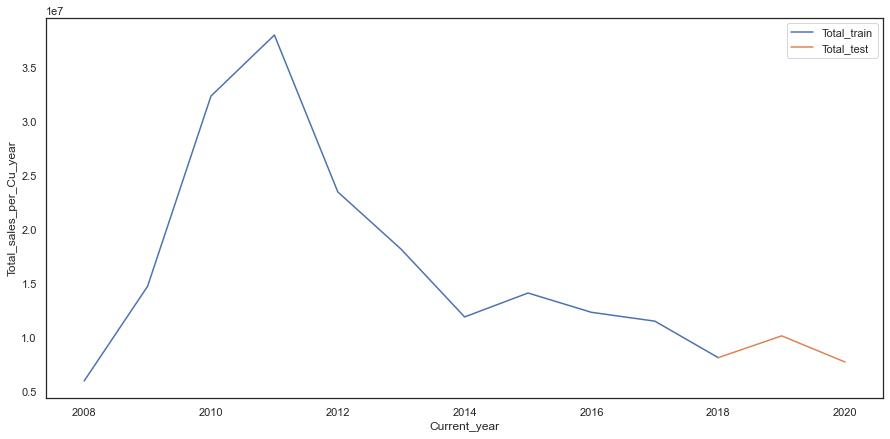

In [80]:

sns.lineplot(x = X_trainSum.index, y = 'Total_sales_per_Cu_year', data = X_trainSum, label='Total_train') 
sns.lineplot(x = X_testSum.index, y = 'Total_sales_per_Cu_year', data = X_testSum, label='Total_test') 

D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-558-c3c159418200>:26: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  Meth_of_H_W = ExponentialSmoothing(np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1]),  seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.244)
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible 

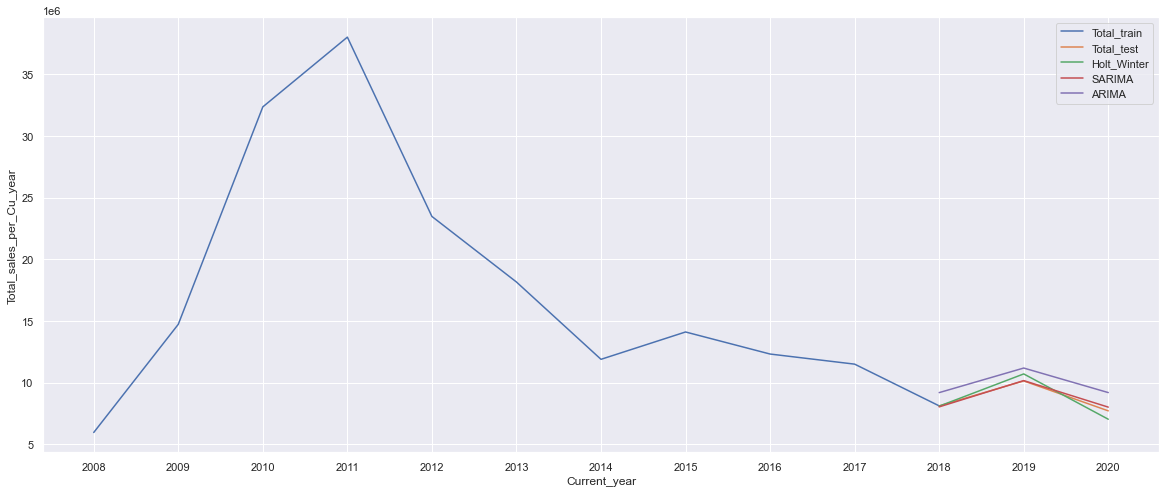

In [558]:
y_hat2 = X_testSum.copy() #копия таблицы куда будут добавляться полученные значения моеделей 
#Naive model
# dd2= np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1]) # чтобы потом взять последнее, -1 потому что отбрасываем 2018 год, его взяли в трэин только чтобы на графике не  

# y_hat2['naive'] = dd2[len(dd)-1] #создаём новый столбец в y_hat все значения которого равны последнему значению Count в df

#AVG MOdel
# y_hat2['avg_forecast'] = X_trainSum['Total_sales_per_Cu_year'][:-1].mean()

# #Moving AVG For
# y_hat2['moving_avg_forecast']=X_train['SalesOf_Cu_year_vol'][:-1].rolling(5).mean().iloc[-1]

#Weights + Moving AVG
# weights1 =  np.array([5, 1, 3, 2])
# y_hat2['Weigth_moving_avg']= X_trainSum['Total_sales_per_Cu_year'][:-1][:-1]. rolling(4).apply(lambda x: np.dot(x, weights1)/weights1.sum(), raw=True).iloc[-1]

# #Simple exp smoothing
# SimExSmoothing=SimpleExpSmoothing(np.array(X_train['SalesOf_Cu_year_vol'][:-1])).fit(smoothing_level=0.04, optimized=False)
# y_hat2['SES'] = SimExSmoothing.forecast(len(X_test));

#Holt 
# Method_of_Holt=Holt(np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1])).fit(smoothing_level=0.3, smoothing_slope = 0.2);
#y_hat2['Holt_linear'] = Method_of_Holt.forecast(len(X_test));

#Holt+Winter
Meth_of_H_W = ExponentialSmoothing(np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1]),  seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.244)
# seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.22) #663109
y_hat2['Holt_Winter'] = Meth_of_H_W.forecast(len(X_testSum))

# SARIMA
X_train22 = X_trainSum.copy() #датафрэйм для саримы, чтобы менять индексы на формат индекс даты
X_train22.index = pd.to_datetime(X_train22.index.values, format='%Y').to_period('Y') #поменяли 

sarimaxSum = sm.tsa.statespace.SARIMAX(X_train22['Total_sales_per_Cu_year'][:-1], order=(2, 0, 2), seasonal_order=(0,0,0,12), enforce_stationary=True).fit()
 
SarTablet2 = pd.DataFrame({'SARIMA':  sarimaxSum.predict(start='2018', end='2020')}) #Таблица с предсказанными значениями
y_hat2['SARIMA'] =np.array(SarTablet2.SARIMA)

SarTablet2 = pd.DataFrame({'SARIMA':  sarimaxSum.predict(start='2008', end='2020')}) #Таблица с предсказанными значениями
# raft =np.array(SarTablet2.SARIMA)


#ARIMA
arima = ARIMA(X_train22['Total_sales_per_Cu_year'][:-1] , order=(1,1,2)).fit() #112
ArTablet = pd.DataFrame({'ARIMA': arima.predict(start='2018-01-01', end='2020-01-01')})
y_hat2['ARIMA'] =np.array(ArTablet.ARIMA)
                   

##GRAPHICS

fig,ax = plt.subplots(figsize=(20,8))
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
plt.xticks(range(2008, 2021));

sns.lineplot(x = X_trainSum.index, y = 'Total_sales_per_Cu_year', data = X_trainSum, label='Total_train') 
sns.lineplot(x = X_testSum.index, y = 'Total_sales_per_Cu_year', data = X_testSum, label='Total_test')

# sns.lineplot(x = y_hat2.index, y = 'naive', data = y_hat2, label = 'VeryNaiveForecast')
# sns.lineplot(x = y_hat.index, y = 'avg_forecast', data = y_hat, label = 'AVGForecast')
# sns.lineplot(x = y_hat.index, y = 'moving_avg_forecast', data = y_hat, label = 'MovingAvg')
# sns.lineplot(x = y_hat2.index, y = 'Weigth_moving_avg', data = y_hat2, label = 'WeightMovAvg')
# sns.lineplot(x = y_hat.index, y = 'SES', data = y_hat, label = 'SES');
# sns.lineplot(x = y_hat2.index, y = 'Holt_linear', data = y_hat2, label = 'Holt_linear');
sns.lineplot(x = y_hat2.index, y = 'Holt_Winter', data = y_hat2, label = 'Holt_Winter');
sns.lineplot(x = y_hat2.index, y = 'SARIMA', data = y_hat2, label = 'SARIMA');
sns.lineplot(x = y_hat2.index, y = 'ARIMA', data = y_hat2, label = 'ARIMA');

plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
plt.xticks(range(2008, 2021));

In [537]:
y_hat2

,Total_sales_per_Cu_year,Holt_Winter,SARIMA,ARIMA
Current_year,,,,
2018,8113317,8.092229e+06,8.031958e+06,9.187683e+06
2019,10134232,1.070272e+07,1.016178e+07,1.117924e+07
2020,7709667,7.030438e+06,8.011735e+06,9.190534e+06


In [582]:
sqrt(mean_squared_error(X_testSum['Total_sales_per_Cu_year'], y_hat2['SARIMA']))


181313.0510360086

In [526]:
mae2 = mean_absolute_error(X_testSum['Total_sales_per_Cu_year'], y_hat2['SARIMAX'])
mae2

136992.85277245133

In [637]:
X_for_SarimaPred = data1.Total_sales_per_Cu_year.copy() #датафрэйм для саримы, чтобы менять индексы на формат индекс даты
X_for_SarimaPred.index = pd.to_datetime(X_for_SarimaPred.index.values, format='%Y').to_period('Y') #поменяли 

sarimaxSum = sm.tsa.statespace.SARIMAX(X_for_SarimaPred.head(10), order=(2, 0, 2), seasonal_order=(0,0,0,12), enforce_stationary=True).fit()
 
SarTablet3 = pd.DataFrame({'Total_sales_per_Cu_year':  sarimaxSum.predict(start='2021', end='2023')}) #Таблица с предсказанными значениями
# y_hat2['SARIMAX'] =np.array(SarTablet2.SARIMAX)


D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [640]:
SarTablet3.index.to_series

<bound method Index.to_series of PeriodIndex(['2021', '2022', '2023'], dtype='period[A-DEC]', freq='A-DEC')>

In [609]:
X_for_SarimaPred.head(10)

2008     5956540
2009    14721241
2010    32343809
2011    37996373
2012    23464866
2013    18151599
2014    11885957
2015    14102521
2016    12314326
2017    11495532
Freq: A-DEC, Name: Total_sales_per_Cu_year, dtype: int64

In [634]:
SarTablet3.index = SarTablet3.index.astype(str)

In [652]:
SarTablet3

,Total_sales_per_Cu_year
2021,1.014157e+07
2022,7.991556e+06
2023,1.012140e+07


In [653]:
initialDataOfTotal = pd.DataFrame(data1.Total_sales_per_Cu_year)

In [654]:
initialDataOfTotal

,Total_sales_per_Cu_year
Current_year,
2008,5956540
2009,14721241
2010,32343809
2011,37996373
2012,23464866
2013,18151599
2014,11885957
2015,14102521
2016,12314326


In [670]:
FullOfTotal = pd.concat([initialDataOfTotal, SarTablet3])
FullOfTotal

,Total_sales_per_Cu_year
2008,5.956540e+06
2009,1.472124e+07
2010,3.234381e+07
2011,3.799637e+07
2012,2.346487e+07
2013,1.815160e+07
2014,1.188596e+07
2015,1.410252e+07
2016,1.231433e+07
2017,1.149553e+07


<AxesSubplot:>

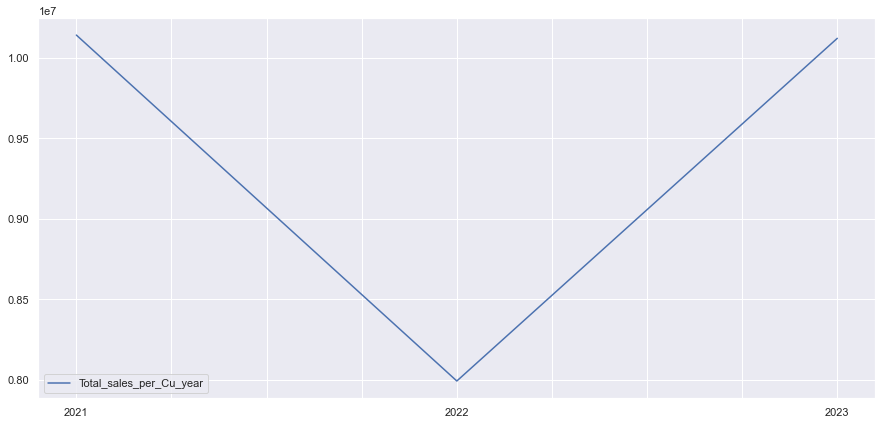

In [662]:
FullOfTotal.head(14)
FullOfTotal.tail(3)

In [ ]:
#Общий график с предсказаниями 

In [661]:
FullTabletOfCurSale.head(21)

,SalesOf_Cu_year_vol
Current_year,
2008,4.869186e+06
2009,7.784185e+06
2010,1.270197e+07
2011,1.231603e+07
2012,1.209326e+07
2013,1.143098e+07
2014,8.543430e+06
2015,1.199320e+07
2016,1.049803e+07


In [691]:
Meth_of_H_W = ExponentialSmoothing(np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1]),  seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.244)
# seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.22) #663109
HWPred = pd.DataFrame(Meth_of_H_W.forecast(6))

D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-691-ba6e1fe92580>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  Meth_of_H_W = ExponentialSmoothing(np.asarray(X_trainSum['Total_sales_per_Cu_year'][:-1]),  seasonal_periods=2 ,trend='multiplicative', seasonal='multiplicative').fit(smoothing_level=0.39, smoothing_slope = 1.244)
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [692]:
HWPred

,0
0,8.092229e+06
1,1.070272e+07
2,7.030438e+06
3,9.298401e+06
4,6.107967e+06
5,8.078347e+06


In [ ]:
HWPred

In [678]:
y_hat2

,Total_sales_per_Cu_year,Holt_Winter,SARIMA,ARIMA
Current_year,,,,
2018,8113317,8.092229e+06,8.031958e+06,9.187683e+06
2019,10134232,1.070272e+07,1.016178e+07,1.117924e+07
2020,7709667,7.030438e+06,8.011735e+06,9.190534e+06


<AxesSubplot:>

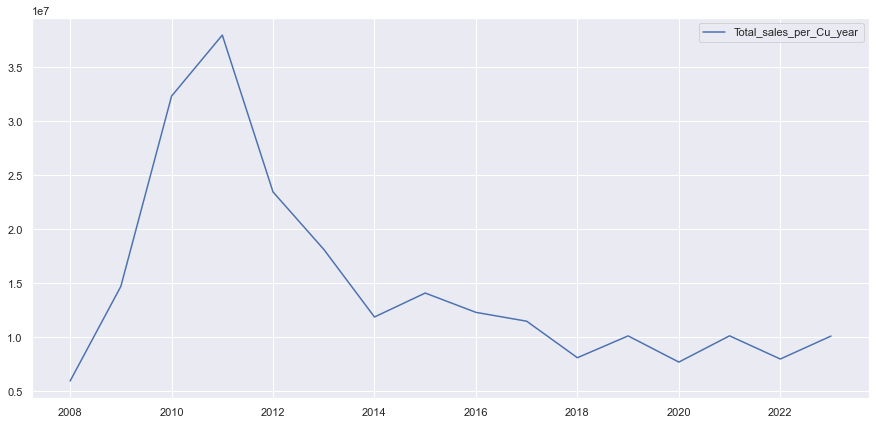

In [669]:
# sns.lineplot(x = FullTabletOfCurSale.head(14).index, y = 'SalesOf_Cu_year_vol', data = FullTabletOfCurSale.head(14), label='Predicted Sales of CY') 
# sns.lineplot(x = FullTabletOfCurSale.tail(3).index, y = 'SalesOf_Cu_year_vol', data = FullTabletOfCurSale.tail(3), label='Predicted Sales of CY') 
# FullTabletOfCurSale.head(21).plot()
# FullTabletOfCurSale.tail(3).plot()
# sns.lineplot(x = FullOfTotal.index, y = 'Total_sales_per_Cu_year', data = FullOfTotal, label='l') 
FullOfTotal.plot()
# sns.lineplot(x = SarTablet3.index, y = 'Total_sales_per_Cu_year', data = SarTablet3, label='Predicted Sales of CY') 

In [929]:
sarimax = sm.tsa.statespace.SARIMAX(X_train2['SalesOf_Cu_year_vol'][:-1], 
                                    order=(1,2,1), 
                                    seasonal_order=(0,0,0,13), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False).fit()

# y_hat['SARIMA'] = sarimax.predict(start='2018', end='2021')
SarTablet = pd.DataFrame({'SARIMAX':  sarimax.predict(start='2018-01-01', end='2020-01-01')})
np.array(SarTablet.SARIMAX)
# SARIMA.index=pd.DatetimeIndex(SARIMA.index.values, freq='D')


D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


array([9499640.00088524, 9020275.89670296, 8547309.93720032])

In [909]:
y_hat['SARIMA']

Current_year
2018   NaN
2019   NaN
2020   NaN
Name: SARIMA, dtype: float64

In [860]:
y_hat

,SalesOf_Cu_year_vol,naive,avg_forecast,moving_avg_forecast,Weigth_moving_avg,SES,Holt_linear,Holt_Winter,SARIMA,SARIMAx
Current_year,,,,,,,,,,
2018,6718074,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,7.949344e+06,6.690887e+06,NaN,NaN
2019,8581123,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,6.937092e+06,8.966198e+06,NaN,NaN
2020,5759228,9955439,10218572.0,10484216.6,8.657936e+06,6.692689e+06,5.924839e+06,5.534352e+06,NaN,NaN


In [12]:
X = data1.drop(['SalesOf_Cu_year_vol', 'SalesOf_NOTCu_year_vol'], axis=1)
X

,Total_sales_per_Cu_year
Current_year,
2008,5956540
2009,14721241
2010,32343809
2011,37996373
2012,23464866
2013,18151599
2014,11885957
2015,14102521
2016,12314326


In [13]:
X_train = X.head(10)
X_train.index = pd.to_datetime(X_train.index, format='%Y')
X_test = X.tail(3)
X_test.index = pd.to_datetime(X_test.index, format='%Y')

In [14]:
X_train

,Total_sales_per_Cu_year
Current_year,
2008-01-01,5956540
2009-01-01,14721241
2010-01-01,32343809
2011-01-01,37996373
2012-01-01,23464866
2013-01-01,18151599
2014-01-01,11885957
2015-01-01,14102521
2016-01-01,12314326


In [15]:
X_test

,Total_sales_per_Cu_year
Current_year,
2018-01-01,8113317
2019-01-01,10134232
2020-01-01,7709667


In [268]:
X_train2['SalesOf_Cu_year_vol'][:-1]

2008     4869186
2009     7784185
2010    12701973
2011    12316031
2012    12093262
2013    11430979
2014     8543430
2015    11993204
2016    10498031
2017     9955439
Freq: A-DEC, Name: SalesOf_Cu_year_vol, dtype: int64

In [283]:
Xtrain2ForDecompose = X_train2.copy()
Xtrain2ForDecompose.index = Xtrain2ForDecompose.index.to_timestamp()

In [284]:
Xtrain22ForDecompose = X_train22.copy()
Xtrain22ForDecompose.index = Xtrain22ForDecompose.index.to_timestamp()

In [286]:
Xtrain22ForDecompose

,Total_sales_per_Cu_year
2008-01-01,5956540
2009-01-01,14721241
2010-01-01,32343809
2011-01-01,37996373
2012-01-01,23464866
2013-01-01,18151599
2014-01-01,11885957
2015-01-01,14102521
2016-01-01,12314326
2017-01-01,11495532


In [275]:
Xtrain2ForDecompose

DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

Критерий Дики-Фулер: p=0.158039


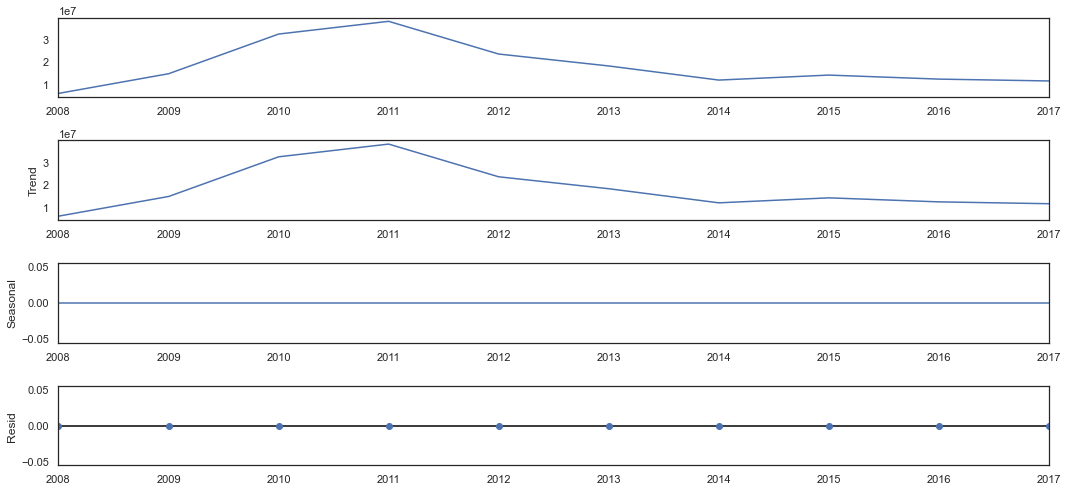

In [297]:

sm.tsa.seasonal_decompose(Xtrain222ForDecompose[:-1]).plot();

print(
    'Критерий Дики-Фулер: p=%f' % sm.tsa.stattools.adfuller(X_train22['Total_sales_per_Cu_year'][:-1])[1]
)
plt.show()

In [ ]:

predicted_mean
2018	7.297772e+06
2019	4.048736e+06
2020	5.333239e+05

In [59]:
import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 13) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='Y'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
             #try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
             #except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data

sarimax_gridsearch(X_train22['Total_sales_per_Cu_year'][:-1], pdq, pdqs, freq='Y')

 3, 0) x (1, 2, 0, 13)12 : BIC Calculated =nan
D:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
SARIMAX (3, 3, 0) x (1, 2, 1, 13)12 : BIC Calculated =nan
SARIMAX (3, 3, 0) x (1, 2, 2, 13)12 : BIC Calculated =nan
D:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

,pdq,pdqs,bic
960,"(0, 3, 3)","(0, 0, 0, 13)",108.264954
1984,"(1, 3, 3)","(0, 0, 0, 13)",109.359625
3008,"(2, 3, 3)","(0, 0, 0, 13)",110.458237
4032,"(3, 3, 3)","(0, 0, 0, 13)",111.556849
3904,"(3, 3, 1)","(0, 0, 0, 13)",131.187402
